# 資管四 唐瑋廷 B05705043 HW2

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

## Q1

### 讀取 training data

In [2]:
df = pd.read_csv('data/df1_train.csv')

### 分析 dataset

In [3]:
df.describe()

,life_post_consumer,comp_page_like,Paid,life_post_reach,life_post_impression_liked,life_post_reach_liked,comment,like,share,type_link,...,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14
count,400.000000,400.000000,400.000000,400.000000,4.000000e+02,400.000000,400.000000,400.00000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000
mean,810.340000,122890.625000,0.260000,13436.855000,1.747735e+04,6585.952500,6.855000,169.07250,25.485000,0.037500,...,0.022500,0.030000,0.032500,0.022500,0.062500,0.150000,0.092500,0.055000,0.102500,0.02500
std,899.037251,16280.121461,0.439184,20454.614675,6.614514e+04,7599.228501,14.402519,243.14837,25.946248,0.190221,...,0.148489,0.170801,0.177546,0.148489,0.242365,0.357519,0.290093,0.228266,0.303685,0.15632
min,17.000000,81370.000000,0.000000,238.000000,5.670000e+02,236.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,335.000000,112676.000000,0.000000,3282.500000,3.962500e+03,2171.000000,1.000000,55.75000,10.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,554.500000,128816.000000,0.000000,5150.000000,6.214500e+03,3391.000000,3.000000,98.00000,18.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,955.500000,136393.000000,1.000000,13232.000000,1.510450e+04,8011.000000,7.000000,187.25000,32.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,11328.000000,139441.000000,1.000000,139008.000000,1.107833e+06,48368.000000,146.000000,1998.00000,208.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


用幾個連續數值的變數對y作散佈圖

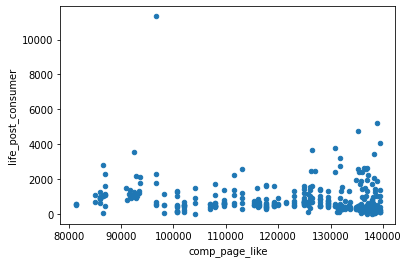

In [4]:
df.plot.scatter(x='comp_page_like',
                      y='life_post_consumer')

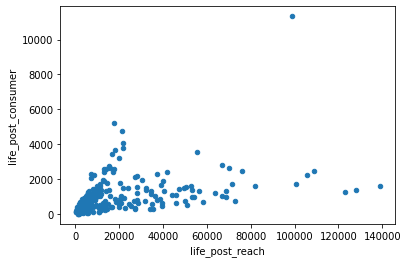

In [5]:
df.plot.scatter(x='life_post_reach',
                      y='life_post_consumer')

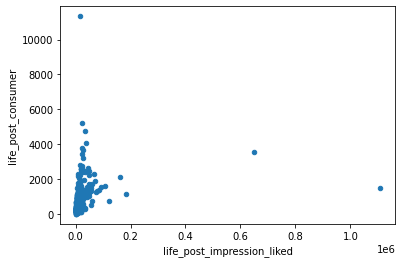

In [6]:
df.plot.scatter(x='life_post_impression_liked',
                      y='life_post_consumer')

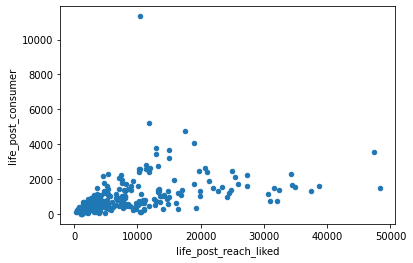

In [7]:
df.plot.scatter(x='life_post_reach_liked',
                      y='life_post_consumer')

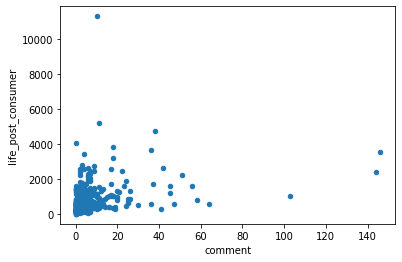

In [8]:
df.plot.scatter(x='comment',
                      y='life_post_consumer')

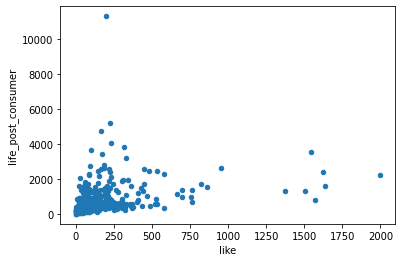

In [9]:
df.plot.scatter(x='like',
                      y='life_post_consumer')

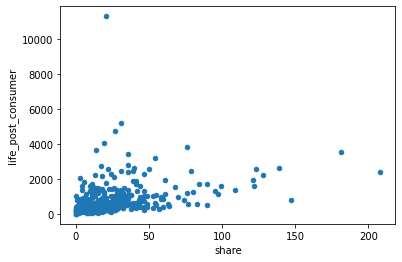

In [10]:
df.plot.scatter(x='share',
                      y='life_post_consumer')

可以看出大致上，大部分變數和y是成正相關，但也可以看出少數資料點屬於outlier，而這些極端值可能對於線性迴歸產生影響。

## Q2

#### RMSE

In [11]:
def rmse(p, gt):
    return np.sqrt(((p - gt)**2).mean())

直接使用 training data 的 y mean 作為預測結果

In [12]:
pred = pd.read_csv('data/df1_train.csv')['life_post_consumer'].mean()
print(f'predict: {pred}')

predict: 810.34


讀取 test data

In [13]:
test_y = pd.read_csv('data/df1_test1y.csv')['life_post_consumer'].to_numpy()

In [14]:
error = rmse(np.array([pred]*50), test_y)
print(f'RMSE: {error}')

RMSE: 928.8095109332162


In [15]:
print('predict:', np.array([pred]*20))
print('gt:', test_y[:20])

predict: [810.34 810.34 810.34 810.34 810.34 810.34 810.34 810.34 810.34 810.34
 810.34 810.34 810.34 810.34 810.34 810.34 810.34 810.34 810.34 810.34]
gt: [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


## Q3

讀取 training data & test data

In [16]:
train = pd.read_csv('data/df1_train.csv')
train_x = train.drop(columns=['life_post_consumer']).to_numpy()
train_y = train['life_post_consumer'].to_numpy()
test_x = pd.read_csv('data/df1_test1.csv').to_numpy()
test_y = pd.read_csv('data/df1_test1y.csv')['life_post_consumer'].to_numpy()

直接把 raw data 丟進去 train

In [17]:
reg = LinearRegression().fit(train_x, train_y)
pred = reg.predict(test_x)

計算 RMSE 並印出結果

In [18]:
error = rmse(pred, test_y)
print(f'RMSE: {error}')

RMSE: 692.2891271383396


In [19]:
print('predict:', pred[:20])
print('gt:', test_y[:20])

predict: [ 781.57991507  315.92043112 2279.0848524  -136.34286373  302.35624062
  462.42402368  321.67770824  504.52244767  505.89547104  488.36700578
  392.61423519  388.9184671   804.87527509  634.32364432  176.31765618
  645.72913809 1983.53858871 3144.39710045 4060.61071219 4288.22308101]
gt: [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


## Q4

讀取 training data & test data

In [20]:
train = pd.read_csv('data/df1_train.csv')
train_x = train.drop(columns=['life_post_consumer']).to_numpy()
train_y = train['life_post_consumer'].to_numpy()
test_x = pd.read_csv('data/df1_test1.csv').to_numpy()
test_y = pd.read_csv('data/df1_test1y.csv')['life_post_consumer'].to_numpy()

對 y data 做 de-mean

In [21]:
y_mean = train_y.mean()
train_y = train_y - y_mean

In [22]:
reg = LinearRegression().fit(train_x, train_y)
pred = reg.predict(test_x)
pred = pred + y_mean

計算 RMSE 並印出結果

In [23]:
error = rmse(pred, test_y)
print(f'RMSE: {error}')

RMSE: 692.2891271383959


In [24]:
print('predict:', pred[:20])
print('gt:', test_y[:20])

predict: [ 781.57991507  315.92043112 2279.0848524  -136.34286373  302.35624062
  462.42402368  321.67770824  504.52244767  505.89547104  488.36700578
  392.61423519  388.9184671   804.87527509  634.32364432  176.31765618
  645.72913809 1983.53858871 3144.39710045 4060.61071219 4288.22308101]
gt: [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


## Q5

讀取 training data & test data

In [25]:
train = pd.read_csv('data/df1_train.csv')
train_x = train.drop(columns=['life_post_consumer']).to_numpy()
train_y = train['life_post_consumer'].to_numpy()
test_x = pd.read_csv('data/df1_test1.csv').to_numpy()
test_y = pd.read_csv('data/df1_test1y.csv')['life_post_consumer'].to_numpy()

對 y data 做 de-mean

In [26]:
y_mean = train_y.mean()
train_y = train_y - y_mean

對所有 training & test data 的 x 做標準化

In [27]:
mean_train, std_train = train_x.mean(axis=0), train_x.std(axis=0)
train_x = ((train_x - mean_train) / std_train)
test_x = ((test_x - mean_train) / std_train)

In [28]:
reg = LinearRegression().fit(train_x, train_y)
pred = reg.predict(test_x)
pred = pred + y_mean

計算 RMSE 並印出結果

In [29]:
error = rmse(pred, test_y)
print(f'RMSE: {error}')

RMSE: 692.2891271372001


In [30]:
print('predict:', pred[:20])
print('gt:', test_y[:20])

predict: [ 781.57991507  315.92043112 2279.0848524  -136.34286373  302.35624062
  462.42402368  321.67770824  504.52244767  505.89547104  488.36700578
  392.61423519  388.9184671   804.87527509  634.32364432  176.31765618
  645.72913809 1983.53858871 3144.39710045 4060.61071219 4288.223081  ]
gt: [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


## Q6

讀取 training data & test data

In [31]:
train = pd.read_csv('data/df1_train.csv')
train_x = train.drop(columns=['life_post_consumer']).to_numpy()
train_y = train['life_post_consumer'].to_numpy()
test_x = pd.read_csv('data/df1_test1.csv').to_numpy()
test_y = pd.read_csv('data/df1_test1y.csv')['life_post_consumer'].to_numpy()

待測試的 alpha

In [32]:
alpha = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]

直接把 raw data 丟進去 train

In [33]:
error = []
for a in alpha:
    reg = Ridge(alpha=a).fit(train_x, train_y)
    pred = reg.predict(test_x)
    error.append(rmse(pred, test_y))

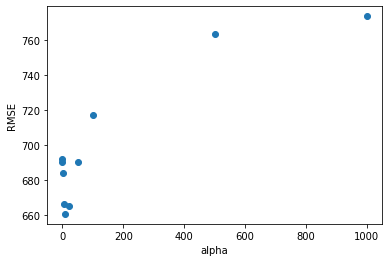

In [34]:
plt.scatter(alpha, error)
plt.ylabel('RMSE')
plt.xlabel('alpha')
plt.show()

In [35]:
print(f'我們可以發現在 alpha = {alpha[error.index(min(error))]} 時，有最小的rmse: {min(error)}。')

我們可以發現在 alpha = 10 時，有最小的rmse: 660.5612900111676。


In [36]:
reg = Ridge(alpha=alpha[error.index(min(error))]).fit(train_x, train_y)
pred = reg.predict(test_x)
print('predict:', pred[:20])
print('gt:', test_y[:20])

predict: [1068.33362385  229.7553192  2008.55889192 -102.8748995   541.45769947
  606.45925756  414.98279829  602.81051442  500.18438508  492.30663558
  508.37649961  409.13002153  730.46768043  561.0603282   294.45089723
  602.48286746 1632.18271503 2698.88281782 3841.63152846 3892.40090903]
gt: [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


## Q7

讀取 training data & test data

In [37]:
train = pd.read_csv('data/df1_train.csv')
train_x = train.drop(columns=['life_post_consumer']).to_numpy().astype(float)
train_y = train['life_post_consumer'].to_numpy()
test_x = pd.read_csv('data/df1_test1.csv').to_numpy().astype(float)
test_y = pd.read_csv('data/df1_test1y.csv')['life_post_consumer'].to_numpy()

對 y data 做 de-mean

In [38]:
y_mean = train_y.mean()
train_y = train_y - y_mean

只對所有 training & test data 的 x_continue 做標準化

In [39]:
for i in [0 ,2, 3, 4, 5, 6, 7]:
    mean_train, std_train = train_x[:,i].mean(), train_x[:,i].std()
    train_x[:,i] = (train_x[:,i]-mean_train)/std_train
    test_x[:,i] = (test_x[:,i] - mean_train) / std_train

待測試的 alpha

In [40]:
alpha = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]

In [41]:
error = []
for a in alpha:
    reg = Ridge(alpha=a).fit(train_x, train_y)
    pred = reg.predict(test_x) + y_mean
    error.append(rmse(pred, test_y))

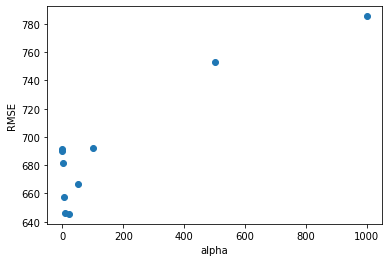

In [42]:
plt.scatter(alpha, error)
plt.ylabel('RMSE')
plt.xlabel('alpha')
plt.show()

In [43]:
print(f'我們可以發現在 alpha = {alpha[error.index(min(error))]} 時，有最小的rmse: {min(error)}。')

我們可以發現在 alpha = 20 時，有最小的rmse: 645.5168123938736。


In [44]:
reg = Ridge(alpha=alpha[error.index(min(error))]).fit(train_x, train_y)
pred = reg.predict(test_x) + y_mean
print('predict:', pred[:20])
print('gt:', test_y[:20])

predict: [1142.26954234  254.15701492 1834.02488944   15.7181687   599.76366292
  635.94038984  427.85644416  603.66205989  514.52378787  580.00106007
  544.34176021  477.18442084  801.54554542  557.45287238  396.27886548
  615.15152412 1474.67417376 2504.86437273 3524.85964481 3438.40343713]
gt: [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


## Q8

讀取 training data & test data

In [45]:
train = pd.read_csv('data/df1_train.csv')
train_x = train.drop(columns=['life_post_consumer']).to_numpy()
train_y = train['life_post_consumer'].to_numpy()
test_x = pd.read_csv('data/df1_test1.csv').to_numpy()
test_y = pd.read_csv('data/df1_test1y.csv')['life_post_consumer'].to_numpy()

對 y data 做 de-mean

In [46]:
y_mean = train_y.mean()
train_y = train_y - y_mean

In [47]:
reg = Ridge().fit(train_x, train_y)
pred = reg.predict(test_x)
pred = pred + y_mean

待測試的 alpha

In [48]:
alpha = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]

In [49]:
error = []
for a in alpha:
    reg = Ridge(alpha=a).fit(train_x, train_y)
    pred = reg.predict(test_x) + y_mean
    error.append(rmse(pred, test_y))

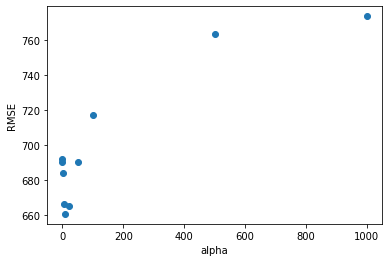

In [50]:
plt.scatter(alpha, error)
plt.ylabel('RMSE')
plt.xlabel('alpha')
plt.show()

In [51]:
print(f'我們可以發現在 alpha = {alpha[error.index(min(error))]} 時，有最小的rmse: {min(error)}。')

我們可以發現在 alpha = 10 時，有最小的rmse: 660.5612900111674。


In [52]:
reg = Ridge(alpha=alpha[error.index(min(error))]).fit(train_x, train_y)
pred = reg.predict(test_x) + y_mean
print('predict:', pred[:20])
print('gt:', test_y[:20])

predict: [1068.33362385  229.7553192  2008.55889192 -102.8748995   541.45769947
  606.45925756  414.98279829  602.81051442  500.18438508  492.30663558
  508.37649961  409.13002153  730.46768043  561.0603282   294.45089723
  602.48286746 1632.18271503 2698.88281782 3841.63152846 3892.40090903]
gt: [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


## Q9

讀取 training data & test data

In [53]:
train = pd.read_csv('data/df1_train.csv')
train_x = train.drop(columns=['life_post_consumer']).to_numpy()
train_y = train['life_post_consumer'].to_numpy()
test_x = pd.read_csv('data/df1_test1.csv').to_numpy()
test_y = pd.read_csv('data/df1_test1y.csv')['life_post_consumer'].to_numpy()

對 y data 做 de-mean

In [54]:
y_mean = train_y.mean()
train_y = train_y - y_mean

對所有 training & test data 的 x 做標準化

In [55]:
mean_train, std_train = train_x.mean(axis=0), train_x.std(axis=0)
train_x = ((train_x - mean_train) / std_train)
test_x = ((test_x - mean_train) / std_train)

待測試的 alpha

In [56]:
alpha = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]

In [57]:
error = []
for a in alpha:
    reg = Ridge(alpha=a).fit(train_x, train_y)
    pred = reg.predict(test_x) + y_mean
    error.append(rmse(pred, test_y))

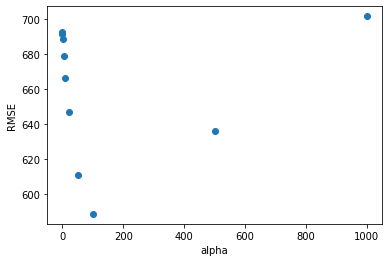

In [58]:
plt.scatter(alpha, error)
plt.ylabel('RMSE')
plt.xlabel('alpha')
plt.show()

In [59]:
print(f'我們可以發現在 alpha = {alpha[error.index(min(error))]} 時，有最小的rmse: {min(error)}。')

我們可以發現在 alpha = 100 時，有最小的rmse: 588.793465752767。


In [60]:
reg = Ridge(alpha=alpha[error.index(min(error))]).fit(train_x, train_y)
pred = reg.predict(test_x) + y_mean
print('predict:', pred[:20])
print('gt:', test_y[:20])

predict: [1040.50012261  278.4650498  1997.72446427  -21.14036502  554.2152571
  602.8406419   337.52346959  599.43578526  470.29370416  500.7241404
  511.14861912  387.7435535   700.08957652  532.22280969  255.18311778
  653.3563783  1728.16919169 2775.00271095 3174.79225189 3141.85797609]
gt: [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


## Q10

讀取 training data & test data

In [61]:
train = pd.read_csv('data/df1_train.csv')
train_x = train.drop(columns=['life_post_consumer']).to_numpy().astype(float)
train_y = train['life_post_consumer'].to_numpy()
test_x = pd.read_csv('data/df1_test1.csv').to_numpy().astype(float)
test_y = pd.read_csv('data/df1_test1y.csv')['life_post_consumer'].to_numpy()

對 y data 做 de-mean

In [62]:
y_mean = train_y.mean()
train_y = train_y - y_mean

只對所有 training & test data 的 x_continue 做標準化

In [63]:
for i in [0 ,2, 3, 4, 5, 6, 7]:
    mean_train, std_train = train_x[:,i].mean(), train_x[:,i].std()
    train_x[:,i] = (train_x[:,i]-mean_train)/std_train
    test_x[:,i] = (test_x[:,i] - mean_train) / std_train

待測試的 alpha

In [64]:
alpha = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]

In [65]:
error = []
for a in alpha:
    reg = Lasso(alpha=a).fit(train_x, train_y)
    pred = reg.predict(test_x) + y_mean
    error.append(rmse(pred, test_y))

/home/white123/miniconda3/envs/sl/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47975917.14865048, tolerance: 32249.892375999996
  positive)
/home/white123/miniconda3/envs/sl/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4456630.676001415, tolerance: 32249.892375999996
  positive)


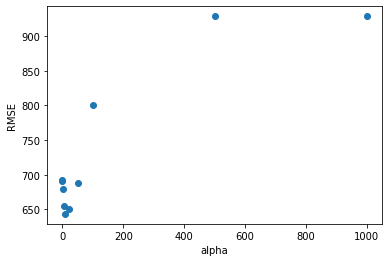

In [66]:
plt.scatter(alpha, error)
plt.ylabel('RMSE')
plt.xlabel('alpha')
plt.show()

In [67]:
print(f'我們可以發現在 alpha = {alpha[error.index(min(error))]} 時，有最小的rmse: {min(error)}。')

我們可以發現在 alpha = 10 時，有最小的rmse: 643.3838482161636。


In [68]:
reg = Lasso(alpha=alpha[error.index(min(error))]).fit(train_x, train_y)
pred = reg.predict(test_x) + y_mean
print('predict:', pred[:20])
print('gt:', test_y[:20])

predict: [1241.59858493  287.88876062 2119.90674732  -16.29718326  449.10115061
  711.14559108  398.05917415  460.15124248  645.44299753  591.43645426
  429.966193    461.48315207  899.80928753  571.86640621  352.86521968
  548.08532475 1741.01511056 2712.05439167 3681.45942744 3645.11403307]
gt: [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


## Q11

從上面的結果可以發現，最好的結果出現在使用 ridge regression 時，並且對所有 x 變數進行標準化。另外，我們也可以發現，對 y 做 de-mean 不太會影響到結果。因此在做 regression 時，最好對 x 變數進行標準化，而且將 model 套用 regularization 通常會得到較好的 performance。